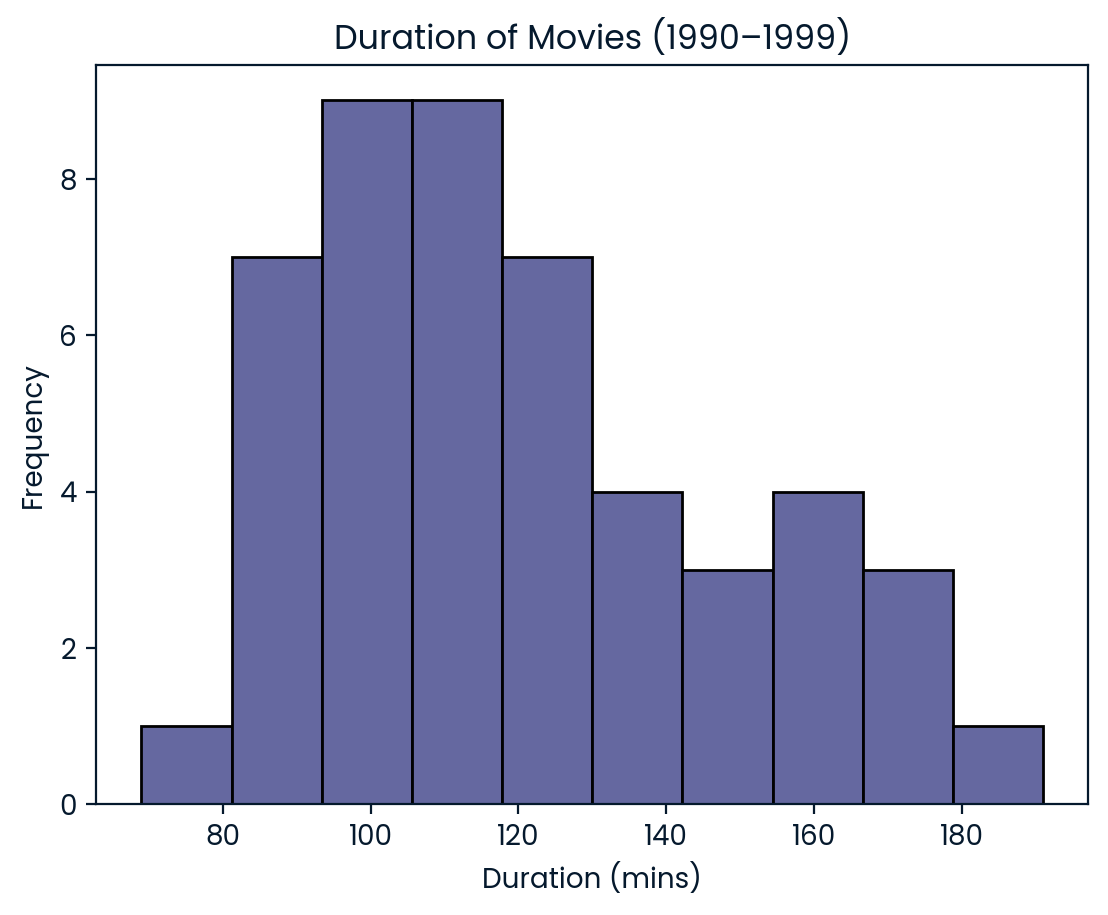

Most frequent duration: 108
Number of movies less than 90 minutes: 7


In [35]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Filter movies from 1990–1999 and type 'Movie'
release = (
    (netflix_df["release_year"] >= 1990) &
    (netflix_df["release_year"] < 2000) &
    (netflix_df["type"] == "Movie") & 
    (netflix_df["genre"] == "Action")# capital 'M' matters
)

# Make a copy of the filtered dataset
release_dataset = netflix_df[release].copy()

# Convert 'duration' to numeric, drop invalid values
release_dataset["duration"] = pd.to_numeric(release_dataset["duration"], errors='coerce')
release_dataset = release_dataset.dropna(subset=["duration"])

# Plotting the histogram
plt.hist(release_dataset["duration"], bins=10, edgecolor="black")
plt.title("Duration of Movies (1990–1999)")
plt.xlabel("Duration (mins)")
plt.ylabel("Frequency")
plt.show()

# Find most frequent duration
if not release_dataset["duration"].mode().empty:
    duration = int(release_dataset["duration"].mode()[0])
    print(f"Most frequent duration: {duration}")
else:
    print("No mode found for duration")

# Count number of movies less than 90 minutes
short_movie_count = (release_dataset["duration"] < 90).sum()
print(f"Number of movies less than 90 minutes: {short_movie_count}")
